当前文件所在的路径：C:\Users\Bear\Route


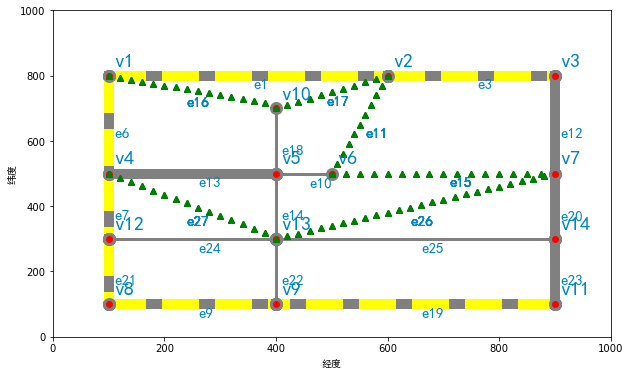

In [9]:
# SVC Classification
# Importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
class Node():

    def __init__(self,name,lat,lng,z,lv,edges):
        self.name = name
        self.lat = lat
        self.lng = lng
        self.z = z
        self.lv = lv  #a set of visible landmarks
        self.edges = edges
        self.visitN = 0 #number of visite
        self.rewardSum = 0 #summary of reward (svm)
        #self.branches = len(edges)

class Edge():

    def __init__(self,text,distance,w,ct,sl,rloslopes,rls,nb,nt,nvl,ntvl,nntvl,nfse,rlfc,rlomr,nohe,rlos,nos,noslopes,rlostep,nost,rlofr,nofre,nodes):
        self.text = text
        self.feature = feature(distance,w,ct,sl,rloslopes,rls,nb,nt,nvl,ntvl,nntvl,nfse,rlfc,rlomr,nohe,rlos,nos,noslopes,rlostep,nost,rlofr,nofre)
        self.nodes = nodes

class feature():

    def __init__(self,distance = 0,w = 0,ct = 0,sl = 0,rloslopes = 0,rls = 0,nb = 0,nt = 0,nvl = 0,ntvl = 0,nntvl = 0,nfse = 0,rloc = 0,rlomr = 0,nohe = 0,rlos = 0,nos = 0,noslopes = 0, rlostep = 0,nost = 0,rlofr = 0,nofre = 0):

        self.header = "distance,w,ct,sl,rloslopes,nb,nt,nvl,ntvl,nntvl,rls,nfse,rloc,rlomr,nohe,rlos,nos,noslopes,rlostep,nost,rlofr,nofre,prefer"
        self.distance = distance  #1.route length
        self.w = w                #2.route wigth
        self.ct = ct              # 0:“sidewalk”, 1:“crosswalk”, or 2:“none”
        self.sl = sl              #sl 0:“stairway”, 1:“slope”, 2:“step”,or 3:“flat”           
        self.rloslopes = rloslopes#15.Route length of slopes
        self.nb = nb              #3.Number of branches
        self.nt = nt              #4.Number of turns
        self.nvl = nvl            #5.Number of visible landmarks
        self.ntvl = ntvl          #6.Number of typical visible landmarks
        self.nntvl = nntvl        #7.Number of non-typical visible landmarks
        self.rls = rls            #8.Route length of sidewalks
        self.nfse = nfse          #9.Number of sidewalk edges
        self.rloc = rloc          #10.Route length of crosswalks
        if self.w == 1:
            self.rloc = self.distance  
        self.rlomr = rlomr
        if self.w == 1:
            self.rlomr = self.distance       #11.Route length of main roads
        self.nohe = nohe          #12.Number of highway edges
        self.rlos = rlos          #13.Route length of stairways
        self.nos = nos            #14.Number of stairways
        self.noslopes = noslopes  #16 Number of slopes
        self.rlostep = rlostep    #17.Route length of step
        if self.w == 0:
            self.rlostep = self.distance
        self.nost = nost          #18.Number of steps
        self.rlofr = rlofr
        if self.w == 1:
            self.rlofr = self.distance #19.Route length of flat roads
        self.nofre = nofre        #20.Number of flat road edges
        self.lv = []
        self.count = 0
#         self.sidewalkCount = 0
#         self.crosswalkCount = 0
#         self.noneCount = 0
#         self.stairwayCount = 0
#         self.slopeCount = 0
#         self.stepCount = 0
#         self.flatCount = 0

        

    def add(self,f):
        self.distance += f.distance  #1.route length
        self.w += f.w                #2.route wigth
        #self.ct += f.ct              # 0:“sidewalk”, 1:“crosswalk”, or 2:“none”
        self.nb += f.nb              #3.Number of branches
        self.nt += f.nt              #4.Number of turns
        self.nvl += f.nvl            #5.Number of visible landmarks
        self.ntvl += f.ntvl          #6.Number of typical visible landmarks
        self.nntvl += f.nntvl        #7.Number of non-typical visible landmarks
        self.rls += f.rls            #8.Route length of sidewalks
        self.nfse += f.nfse          #9.Number of sidewalk edges
        self.rloc += f.rloc          #10.Route length of crosswalks
        self.rlomr += f.rlomr        #11.Route length of main roads
        self.nohe += f.nohe          #12.Number of highway edges
        self.rlos += f.rlos          #13.Route length of stairways
        self.nos += f.nos            #14.Number of stairways
        self.rloslopes += f.rloslopes #15.Route length of slopes
        print("self.rloslopes======"+str(self.rloslopes)+"  f.rloslopes:"+str(f.rloslopes))
        self.noslopes += f.noslopes  #16 Number of slopes
        self.rlostep += f.rlostep    #17.Route length of step
        self.nost += f.nost          #18.Number of steps
        self.rlofr += f.rlofr        #19.Route length of flat roads
        self.nofre += f.nofre        #20.Number of flat road edges
        self.count += 1
        print("self.w==============="+str(self.w))
        print("self.count==============="+str(self.count))

    

    def toFile(self,mode,writeHeader,prefer,filePath):
        if writeHeader:
            aa = self.header
        else:
            aa = str(self.distance)+","+str(self.w)+","+str(self.ct)+","+str(self.sl)+","+str(self.rloslopes)+","+str(self.nb)+","+str(self.nt)+","+str(self.nvl)+","+str(self.ntvl)+","+str(self.nntvl)+","+str(self.rls)+","+str(self.nfse)+","+str(self.rloc)+","+str(self.rlomr)+","+str(self.nohe)+","+str(self.rlos)+","+str(self.nos)+","+str(self.noslopes)+","+str(self.rlostep)+","+str(self.nost)+","+str(self.rlofr)+","+str(self.nofre)
            aa=aa+","+str(prefer)
            print("SVM feature:"+aa)
        #fo = open("C:\\iris\\SVM-classification-on-Iris-dataset-master\\routefeature.csv", mode)
        fo = open(filePath, mode)
        fo.write(aa+"\n")

    def everage(self):
        print("self.count==="+str(self.count))
        self.w = round(self.w/self.count,2)         #route wigth
        #maxValue = max(self.sidewalkCount,self.crosswalkCount,self.noneCount)
        #print("ct=======maxValue:"+str(maxValue))
#         if self.sidewalkCount == maxValue:
#             self.ct = 0
#         elif self.crosswalkCount == maxValue:
#             self.ct = 1
#         else:
#             self.ct = 2
        
#         maxValue = max(self.stairwayCount,self.slopeCount,self.stepCount,self.flatCount)
#         print("sl=======maxValue:"+str(maxValue))
#         if self.stairwayCount == maxValue:
#             self.sl = 0
#         elif self.slopeCount == maxValue:
#             self.sl = 1
#         elif self.stepCount == maxValue:
#             self.sl = 2
#         else:
#             self.sl = 3
        self.rloslopes = round(self.rloslopes/self.distance,2)  #Route length of slopes
        self.rlos = round(self.rlos/self.distance,2)            #Route length of stairways
        self.rlostep = round(self.rlostep/self.distance,2)      #Route length of step
        self.rlofr = round(self.rlofr/self.distance,2)          #Route length of flat roads
        self.nofre = round(self.nofre/self.distance,2)          
        self.rlomr = round(self.rlomr/self.distance,2)          #Route length of main roads
        self.rloc = round(self.rloc/self.distance,2)            #Route length of crosswalks
        self.rls = round(self.rls/self.distance,2)              #Route length of sidewalks
        
        print("self.rloslopes:"+str(self.rloslopes)+" self.rlos:"+str(self.rlos)+" self.rlostep:"+str(self.rlostep)+" self.rlofr:"+str(self.rlofr)+" self.nofre:"+str(self.nofre)+" self.rlomr:"+str(self.rlomr)+" self.rloc:"+str(self.rloc))
        print("self.rloc:"+str(self.rloc)+" self.rls:"+str(self.rls))
        
class Graph():

    def __init__(self):


        e1 = Edge("e1",500,1,0,3,0,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        #e2 = Edge("e2",500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e3 = Edge("e3",300,1,0,3,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        #e4 = Edge("e4",900,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        #e5 = Edge("e5",600,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e6 = Edge("e6",400,1,0,3,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e7 = Edge("e7",200,1,0,3,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        #e8 = Edge("e8",100,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e9 = Edge("e9",300,1,0,3,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e10 = Edge("e10",100,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e11 = Edge("e11",400,0,2,0,400,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e12 = Edge("e12",300,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e13 = Edge("e13",300,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e14 = Edge("e14",200,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e15 = Edge("e15",400,0,0,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e16 = Edge("e16",300,0,2,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e17 = Edge("e17",300,0,1,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e18 = Edge("e18",200,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e19 = Edge("e19",500,1,0,1,0,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e20 = Edge("e20",300,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e21 = Edge("e21",200,1,0,1,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e22 = Edge("e22",200,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e23 = Edge("e23",300,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e24 = Edge("e24",300,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e25 = Edge("e25",500,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e26 = Edge("e26",500,0,2,0,500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        e27 = Edge("e27",400,0,2,0,400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,[])
        v1 = Node("v1",100,800,3,[],{})
        v2 = Node("v2",600,800,3,[],{})
        v3 = Node("v3",900,800,3,[],{})
        v4 = Node("v4",100,500,2,[],{})
        v5 = Node("v5",400,500,1,[],{})
        v6 = Node("v6",500,500,1,[],{})
        v7 = Node("v7",900,500,1,[],{})
        v8 = Node("v8",100,100,1,[],{})
        v9 = Node("v9",400,100,1,[],{})
        v10 = Node("v10",400,700,1,[],{})
        v11 = Node("v11",900,100,1,[],{})
        v12 = Node("v12",100,300,1,[],{})
        v13 = Node("v13",400,300,1,[],{})
        v14 = Node("v14",900,300,1,[],{})
        v1adge = {v2:e1,v4:e6,v10:e16}
        v2adge = {v1:e1,v3:e3,v6:e11,v10:e17}
        v3adge = {v2:e3,v7:e12}
        v4adge = {v1:e6,v5:e13,v12:e7,v13:e27}
        v5adge = {v4:e13,v13:e14,v6:e10,v10:e18}
        v6adge = {v5:e10,v2:e11,v7:e15}
        v7adge = {v6:e15,v3:e12,v14:e20,v13:e26}
        v8adge = {v12:e21,v9:e9}
        v9adge = {v8:e9,v13:e22,v11:e19}
        v10adge = {v1:e16,v2:e17,v5:e18}
        v11adge = {v9:e19,v14:e23}
        v12adge = {v4:e7,v8:e21,v13:e24}
        v13adge = {v5:e14,v9:e22,v12:e24,v14:e25,v4:e27,v7:e26}
        v14adge = {v7:e20,v11:e23,v13:e25}
        v1.edges = v1adge
        v2.edges = v2adge
        v3.edges = v3adge
        v4.edges = v4adge
        v5.edges = v5adge
        v6.edges = v6adge
        v7.edges = v7adge
        v8.edges = v8adge
        v9.edges = v9adge
        v10.edges = v10adge
        v11.edges = v11adge
        v12.edges = v12adge
        v13.edges = v13adge
        v14.edges = v14adge
        e1.nodes = [v1,v2]
        #e2.nodes = [v1,v2]
        e3.nodes = [v2,v3]
        #self.e4.nodes = [self.v3,null]
        #self.e5.nodes = [self.v1,null]
        e6.nodes = [v1,v4]
        e7.nodes = [v4,v12]
        #self.e8.nodes = [self.v8,null]
        e9.nodes = [v8,v9]
        e10.nodes = [v5,v6]
        e11.nodes = [v6,v2]
        e12.nodes = [v7,v3]
        e13.nodes = [v4,v5]
        e14.nodes = [v5,v13]
        e15.nodes = [v6,v7]
        e16.nodes = [v1,v10]
        e17.nodes = [v10,v2]
        e18.nodes = [v10,v5]
        e19.nodes = [v11,v9]
        e20.nodes = [v14,v7]
        e21.nodes = [v12,v8]
        e22.nodes = [v9,v13]
        e23.nodes = [v14,v11]
        e24.nodes = [v12,v13]
        e25.nodes = [v13,v14]
        e26.nodes = [v13,v7]
        e27.nodes = [v4,v13]
        self.nText = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14']
        self.vs = {'v1':v1,'v2':v2,'v3':v3,'v4':v4,'v5':v5,'v6':v6,'v7':v7,'v8':v8,'v9':v9,"v10":v10,"v11":v11,"v12":v12,"v13":v13,"v14":v14}
        self.es = [e1,e3,e6,e7,e9,e10,e11,e12,e13,e14,e15,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25,e26,e27]
        
    import matplotlib.pyplot as plt
    def drawGraph(self,c_lists):
        plt.figure(figsize=(10,6))
        plt.xlim(0,1000,10)     #x轴的刻度范围
        plt.ylim(0,1000,10)       #y轴的刻度范围
        plt.xlabel('经度',fontproperties="simhei")    #x轴的标题
        plt.ylabel('纬度',fontproperties="simhei")    #y轴的标题
        colors=['red','orange','yellow','black','blue','green','brown']
        #绘制各个点及点所代表地点名称
        vs_arr = list(self.vs.values())
        for i in range(len(vs_arr)):
            plt.text(vs_arr[i].lat+10,vs_arr[i].lng+30,self.nText[i],color='#0085c3',fontproperties="simhei",fontsize=20)
            plt.plot(vs_arr[i].lat,vs_arr[i].lng,'o',color='#0085c3')

        #连接各个点
        for i in range(len(self.es)):
            if(self.es[i].nodes):
                start = (self.es[i].nodes[0].lat,self.es[i].nodes[1].lat)
                end = (self.es[i].nodes[0].lng,self.es[i].nodes[1].lng)
                x = abs(self.es[i].nodes[0].lat+self.es[i].nodes[1].lat)/2+10
                y = abs(self.es[i].nodes[0].lng+self.es[i].nodes[1].lng)/2-40
                if(self.es[i].feature.w):
                    plt.text(x,y,self.es[i].text,color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,color="grey",linewidth=10,marker="o",markersize=10,
                    markerfacecolor="red",markeredgewidth=3,markeredgecolor="grey")
                    if self.es[i].feature.ct == 0:
                        plt.plot(start,end,'--',color="yellow",linewidth=10,marker="o",markersize=10,
                        markerfacecolor="red",markeredgewidth=3,markeredgecolor="grey")
                   

                elif self.es[i].feature.sl != 0:
                    plt.text(x,y,self.es[i].text,color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,color="grey",linewidth=3,marker="o",markersize=10,
                    markerfacecolor="red",markeredgewidth=3,markeredgecolor="grey")
                    if self.es[i].feature.ct == 0:
                        plt.plot(start,end,"--",linewidth=3,marker="o",markersize=10,
                        markerfacecolor="red",markeredgewidth=3,markeredgecolor="grey")
                        print("self.es[i].nodes[0].lat===="+str(self.es[i].nodes[0].lat)+" "+str(self.es[i].nodes[1].lat))
                        print("self.es[i].nodes[0].lng===="+str(self.es[i].nodes[0].lng)+" "+str(self.es[i].nodes[1].lng))
                else:   
                    start = np.arange(100,400,20)
                    end = np.arange(500,305,-13)
                    e27x = abs(100+400)/2-10
                    e27y = abs(500+305)/2-60
                    plt.text(e27x,e27y,"e27",color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,"g^")
                    start = np.arange(400,900,20)
                    end = np.arange(300,500,8)
                    e26x = abs(400+900)/2-10
                    e26y = abs(300+500)/2-60
                    plt.text(e26x,e26y,"e26",color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,"g^")
                    start = np.arange(100,400,20)
                    end = np.arange(800,710,-6)
                    e16x = abs(100+400)/2-10
                    e16y = abs(800+710)/2-50
                    plt.text(e16x,e16y,"e16",color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,"g^")
                    start = np.arange(400,600,20)
                    end = np.arange(700,800,10)
                    e17x = abs(400+600)/2-10
                    e17y = abs(700+800)/2-40
                    plt.text(e17x,e17y,"e17",color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,"g^")
                    
                    start = np.arange(600,500,-10)
                    end = np.arange(800,500,-30)
                    e11x = abs(600+500)/2+10
                    e11y = abs(800+500)/2-40
                    plt.text(e11x,e11y,"e11",color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,"g^")
                    
                    start = np.arange(500,900,25)
                    end = [500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500]
                    e15x = abs(500+900)/2+10
                    e15y = abs(500+500)/2-40
                    plt.text(e15x,e15y,"e15",color='#0085c3',fontproperties="simhei",fontsize=15)
                    plt.plot(start,end,"g^")
                        
                   
               

        if(c_lists!=[]):
            print(c_lists)
            for j in range(len(c_lists)):
                c_list = c_lists[j]
                for i in range(len(c_list)-1):
                    start = (self.vs.get(c_list[i]).lat,self.vs.get(c_list[i+1]).lat)
                    end = (self.vs.get(c_list[i]).lng,self.vs.get(c_list[i+1]).lng)
                    plt.plot(start,end,color=colors[j],linewidth=5)

        plt.show()
    def inputPreferedPath(self):
        print("输入prefered路径节点 以逗号分隔：")
        c = input("input:")
        c_list = c.split(",")
        self.drawPic(c_list)
        
    #生成随即路由对，但是要求起点和终点离得比较远
    def generateRandomRoute1(self,n):
        randomPath=[]
        a = 0
        vs_key_arr_start = ['v1','v4','v8','v12']
        vs_key_arr_end = ['v3','v7','v14','v11']
        vs_key_arr = list(self.vs.keys())
        while a < n:
            bb = np.random.choice(vs_key_arr_start)
            cc = np.random.choice(vs_key_arr_end)
            if bb != cc:
                dd=bb+":"+cc
                if dd not in randomPath:
                    randomPath.append(dd)
                    #print("path:"+dd)
                    a=a+1
        return randomPath
    
    def generateRandomRoute(self,n):
        randomPath=[]
        a = 0
        vs_key_arr = list(self.vs.keys())
        while a < n:
            bb = np.random.choice(vs_key_arr)
            cc = np.random.choice(vs_key_arr)
            if bb != cc:
                dd=bb+":"+cc
                if dd not in randomPath:
                    randomPath.append(dd)
                    #print("path:"+dd)
                    a=a+1
        return randomPath
print("当前文件所在的路径："+os.getcwd())    
graph= Graph()
graph.drawGraph([])
#map.inputPreferedPath()   

In [10]:
#!/usr/bin/env python3
import sys
from graphviz import Digraph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd


class GraphHelper():
    def __init__(self):
        self.dot = Digraph(comment='Gragh2Print')
        self.dot.edge_attr.update(arrowhead='none')
        self.dot.graph_attr['rankdir'] = 'LR'
        self.edgeLinks = dict()
        self.size = 0
        self.stack = []
        self.nodeNumber = 0

    def exitWithError(self,*error):
        print(*error)
        exit()
    def printGraph2Pdf(self,grf): 
        grf.render('graph-output/output.gv', view=True)

    def printRoute(self,stackList):
        global nodeNumber
        nodeNumber += 1
        self.dot.node(str(nodeNumber), stackList[0])
        for node in stackList[1:]:
            nodeNumber += 1
            self.dot.node(str(nodeNumber), node)
            self.dot.edge(str(nodeNumber-1), str(nodeNumber))
    def addEdge(self,a, b):
        global edgeLinks
        if a not in self.edgeLinks: 
            self.edgeLinks[a] = set()
        if b not in self.edgeLinks: 
            self.edgeLinks[b] = set()
        self.edgeLinks[a].add(b)
        self.edgeLinks[b].add(a)
    def loadGraph(self,fileName):
        try:f = open(fileName, 'r')
        except:exitWithError("打开文件失败, 请检查文件名是否正确或程序是否有权限访问")
        global size, edgeLinks
        size, edgeCount = map(int, f.readline().split())
        print("节点:", size, "边数:", edgeCount)
        for i in range(1, size+1): 
            self.dot.node(str(i), str(i))
        for i in range(edgeCount):
            a, b = f.readline().split()
            self.addEdge(a, b)
            self.dot.edge(a, b)
        #re = f.readline()
        f.close()
        #return re




    def rmRoute2Itself(self,start):
        for point in self.edgeLinks:
            if point != start and start in self.edgeLinks[point]:
                self.edgeLinks[point].remove(start)
            
    def generateFeaturesForPath(self,goodList,badList,skipHeader,filePath):
        sumFeatures = feature()
        prefer = 0
        if skipHeader==False:
            sumFeatures.toFile("w",True,prefer,filePath)
        for i in range(len(goodList)):
            print("goodList:"+str(goodList[i]))
            sumfeature = feature()
            for j in range(len(goodList[i])-1):
                print("j:"+str(goodList[i][j]))
                v = goodList[i][j]
                vn = goodList[i][j+1]
                sumFeatures = self.featureSum(v,vn,sumfeature)
            prefer = 1
            sumFeatures.everage()
            sumFeatures.toFile("a",False,prefer,filePath)
        print("badList len:"+str(len(badList)))
        for i in range(len(badList)):
            print("badList:"+str(len(badList[i])))
            sumfeature = feature()
            for j in range(len(badList[i])-1):
                v = badList[i][j]
                vn = badList[i][j+1]
                sumFeatures = self.featureSum(v,vn,sumfeature)
            prefer = 0
            sumFeatures.everage()
            sumFeatures.toFile("a",False,prefer,filePath)
        
    def calculateFeature(self,routePath):
         for i in range(len(routePath)-1):
            s = routePath[i]
            n = routePath[i+1]
            print("node1:"+node1+" node2:"+node2)
            e = graph.vs[node1].edges[graph.vs[node2]]
        
        
    def featureSum(self,node1,node2,feature):
        print("node1:"+node1+" node2:"+node2)
        e = graph.vs[node1].edges[graph.vs[node2]]
        print("e.feature.w:"+str(e.feature.w))
        print("feature.w:"+str(feature.w))
        #e.feature.nb = len(graph.vs[node2].edges)
        print("before feature.distance:"+str(feature.distance))
        feature.add(e.feature)
#         print("e.feature.nb=========="+str(e.feature.nb))
#         print("feature.nb=========="+str(feature.nb))
        print("e.feature.distance:"+str(e.feature.distance))
        print("after feature.distance:"+str(feature.distance))
        
        return feature

    def findAllRoutes(self,start, end, allRoutes, c_list=[]):
        global edgeLinks, stack
        self.stack.append(start)
        if start == end:
            if(c_list==self.stack):
                #print("============1111===========")
                self.stack.pop()
            else:
                print("找到路径:", self.stack)
                #self.printRoute(self.stack)
                allRoutes.append(self.stack.copy())
                self.stack.pop()
                #print("=============return===========")

        else:
            for nextPoint in self.edgeLinks[start]:
                if nextPoint not in self.stack:
                    #print("============2222===========nextPoint:"+nextPoint+" end:"+end)
                    self.findAllRoutes(nextPoint, end, allRoutes, c_list)
            #print("============3333===========")
            self.stack.pop()
        #print("route len:"+str(len(routes)))
        
        return allRoutes
    
if __name__ == '__main__':
    arg = 0  #skip trainning, 1:start trainning
    featurePath = "files\\routefeature_young.csv"
    #featurePath = "files\\routefeature_old.csv"
    if arg == 1:
        filePath = 'files\\graph.csv'
        graphHelper= GraphHelper()
        graphHelper.loadGraph(filePath)
        nodeNumber = size + 1
        print("\r\n")
        print("生成1对不同起点到终点。。。")
        randomPath = graph.generateRandomRoute1(1)
        print("randomPath:"+str(randomPath))
        #findAllRoutes(a, b)
        print("\r\n")
        good_lists = []
        badRoutes=[]
        badRoutes1=[]
        for i in randomPath:
            notes = i.split(":")
            print("输入你喜欢的路径节点"+notes[0]+"到"+notes[1]+"以逗号分隔：")
            c = input("input:")
            c_list = c.split(",")
            good_lists.append(c_list)
            print("=========生成从节点:"+notes[0]+"到节点:"+notes[1]+"的随机路径=========:")
            #badRoutes = graphHelper.findAllRoutes("v8", "v4",c_list)
            badRoutes = graphHelper.findAllRoutes(notes[0], notes[1],badRoutes,c_list)
            print("badRoutes len:"+str(len(badRoutes)))
            badRoutes1.append(badRoutes[0])
            print("\r\n")
        graph.drawGraph(good_lists)
        print("开始学习路径。。。")
        appand = True
        graphHelper.generateFeaturesForPath(good_lists,badRoutes1,appand,featurePath)
        
    
        
   
    
    
    

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
dataset = pd.read_csv(featurePath)
dataset.head(100)

,distance,w,ct,sl,rloslopes,nb,nt,nvl,ntvl,nntvl,...,rlomr,nohe,rlos,nos,noslopes,rlostep,nost,rlofr,nofre,prefer
0,1300,0.13,0,0,0.7,0,0,0,0,0,...,0,0,0.50,0,0,0,0,0,0,1
1,1200,0.10,0,0,0.2,0,0,0,0,0,...,0,0,0.00,0,0,0,0,0,0,0
2,1000,0.20,0,0,0.8,0,0,0,0,0,...,0,0,0.80,0,0,0,0,0,0,1
3,18,0.60,0,0,0.3,0,0,0,0,0,...,0,0,0.00,0,0,0,0,0,0,0
4,1100,0.13,0,0,0.9,0,0,0,0,0,...,0,0,0.30,0,0,0,0,0,0,1
5,1500,0.10,0,0,0.1,0,0,0,0,0,...,0,0,0.00,0,0,0,0,0,0,0
6,800,0.20,0,0,0.5,0,0,0,0,0,...,0,0,0.10,0,0,0,0,0,0,1
7,1500,0.10,0,0,0.0,0,0,0,0,0,...,0,0,0.10,0,0,0,0,0,0,0
8,1100,0.13,0,0,0.5,0,0,0,0,0,...,0,0,0.30,0,0,0,0,0,0,1
9,1500,0.80,0,0,0.2,0,0,0,0,0,...,0,0,0.00,0,0,0,0,0,0,0


In [18]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:22].values
y = dataset['prefer'].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)
#Using polynomial kernel
# Fitting SVC Classification to the Training set with linear kernel
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly', random_state = 0, probability=True)
svcclassifier.fit(X_train1, y_train)

# Predicting the Test set results
y_pred1 = svcclassifier.predict(X_test1)
y_pred = svcclassifier.predict_proba(X_test1)
print(y_pred1)
print(y_pred)


[1 0 1 1 1 0]
[[0.25302905 0.74697095]
 [0.49267066 0.50732934]
 [0.40042827 0.59957173]
 [0.20072698 0.79927302]
 [0.28739925 0.71260075]
 [0.99186504 0.00813496]]


In [19]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred1)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:20,:]

array([[1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0]], dtype=int64)

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
kernelPolyAccuracy = corrPred/(cm.sum())
print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))

#6.保存模型成sklearn自带的文件格式
import joblib
#from sklearn.externals import joblib
joblib.dump(svcclassifier, 'files/routemodel.pkl')

[[1 0]
 [1 4]]
Correct predictions:  5
False predictions 1
Accuracy of the SVC Clasification is:  0.8333333333333334


['files/routemodel.pkl']

In [21]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
class AssessRoute():
    def __init__(self):
        self.filePath = "files\\testfeature.csv"
        self.sc = StandardScaler()
        X_train2 = self.sc.fit_transform(X_train)
        self.test_model = joblib.load('files/routemodel.pkl')
 
    def generateFeature(self, pathList):
        
        sumfeatures = feature()
        gf = GraphHelper()
        sumfeatures.toFile("w",True,0,self.filePath)
        #filePath = "files\\testfeature.csv" 
        for i in range(len(pathList)-1):
            print("pathList:"+str(len(pathList)))
            v = pathList[i]
            vn = pathList[i+1]
            print("v:"+v+"   vn:"+vn)
            sumfeatures = gf.featureSum(v,vn,sumfeatures)
        sumfeatures.everage()
        sumfeatures.toFile("a",False,0,self.filePath)
        
    def routeAssess(self):
       
        dataset = pd.read_csv(self.filePath)
        dataset.head(1)
        X = dataset.iloc[:,:22].values
        X1 = sc.transform(X)
        y_pred = self.test_model.predict_proba(X1)
        y_pred1 = self.test_model.predict(X1)
        X1
        print(y_pred[0][1])
        print(y_pred1)
        return y_pred[0][1]

if __name__ == '__main__':
    ar = AssessRoute()
#     #  路径评估器
#     print("输入需要评估的路径节点以逗号分隔：")
#     c = input("input:")
#     c_list = c.split(",")
#     ar.generateFeature(c_list)
#     ar.routeAssess()

输入你需要推荐的起点和终点以逗号分隔：
input:v1,v13
节点: 14 边数: 23
=====================尝试寻找路径，第1次======mcts.nowNode:v1 访问次数：0
遍历节点：v1 的孩子节点，找出PUCB值最高的节点
PUCB优先选择一个没有被访问过的节点:v2
mcts.selectNode===v2 mcts.end:v13
找所有路由，从v2 到v13
key in dict:v1-v2-v13
找到路径: ['v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v5', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v1', 'v10', 'v5', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v14', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v6', 'v5', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v6', 'v5', 'v10', 'v1', 'v4', 'v12', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v6', 'v5', 'v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v6', 'v5', 'v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v13']
找到路径: ['v2', 'v3', 'v7', 'v6', 'v5', 'v10', 'v1', 'v4'

path in allRoutes=====['v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v7', 'v3', 'v2', 'v6', 'v5', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v7', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v7', 'v6', 'v5', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v5', 'v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v5', 'v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v5', 'v6', 'v2', 'v3', 'v7', 'v14', 'v13']
duplicate:v1 break
path in allRoutes=====['v10', 'v1', 'v4', 'v5', 'v6', 'v2', 'v3', 'v7', 'v13']
duplicate:v1 break
pat

pathList:5
v:v10   vn:v2
node1:v10 node2:v2
e.feature.w:0
feature.w:0
before feature.distance:0
self.rloslopes======300  f.rloslopes:300
self.w===============0
self.count===============1
e.feature.distance:300
after feature.distance:300
pathList:5
v:v2   vn:v6
node1:v2 node2:v6
e.feature.w:0
feature.w:0
before feature.distance:300
self.rloslopes======700  f.rloslopes:400
self.w===============0
self.count===============2
e.feature.distance:400
after feature.distance:700
pathList:5
v:v6   vn:v7
node1:v6 node2:v7
e.feature.w:0
feature.w:0
before feature.distance:700
self.rloslopes======1100  f.rloslopes:400
self.w===============0
self.count===============3
e.feature.distance:400
after feature.distance:1100
pathList:5
v:v7   vn:v13
node1:v7 node2:v13
e.feature.w:0
feature.w:0
before feature.distance:1100
self.rloslopes======1600  f.rloslopes:500
self.w===============0
self.count===============4
e.feature.distance:500
after feature.distance:1600
self.count===4
self.rloslopes:1.0 self.rlos:0

0.35433901000398577
[0]
放到svm去评估分数:0.35433901000398577
=====================尝试寻找路径，第2次======mcts.nowNode:v2 访问次数：1
遍历节点：v2 的孩子节点，找出PUCB值最高的节点
放弃孩子节点:v1 因为已经在模拟列表中:
v1
v10
v2
x2:0.0 x1:0.0
==========计算节点v3的PUCB值================
parentNode:v2 访问次数：1 current node:v3 访问次数：1 rewardSum/visiteN:0.35433901000398577 PUCB:0.35433901000398577
currPUCB:0.35433901000398577 currNode:v3
maxNode:v3
PUCB优先选择一个没有被访问过的节点:v6
mcts.selectNode===v6 mcts.end:v13
找所有路由，从v6 到v13
key in dict:v2-v6-v13
找到路径: ['v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v13']
找到路径: ['v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v13']
找到路径: ['v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v5', 'v13']
找到路径: ['v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v13']
找到路径: ['v6', 'v2', 'v3', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v1', 'v10', 'v5', 'v13']
找到路径: ['v6', 'v2', 'v3', 'v7', 'v14', 'v13']
找到路径: ['v6', 'v2', 'v3', 'v7', 'v13']
找到路径: ['v6', 'v2', 'v10', 'v5', 'v13']
找到路径: ['v6', 

0.2524836793790321
[0]
放到svm去评估分数:0.2524836793790321
=====================尝试寻找路径，第10次======mcts.nowNode:v2 访问次数：9
遍历节点：v2 的孩子节点，找出PUCB值最高的节点
放弃孩子节点:v1 因为已经在模拟列表中:
v1
v10
v2
x2:1.2102959906117234 x1:4.394449154672439
==========计算节点v3的PUCB值================
parentNode:v2 访问次数：9 current node:v3 访问次数：3 rewardSum/visiteN:0.31456506609857793 PUCB:1.5248610567103014
currPUCB:1.5248610567103014 currNode:v3
maxNode:v3
x2:0.8558085022044397 x1:4.394449154672439
==========计算节点v6的PUCB值================
parentNode:v2 访问次数：9 current node:v6 访问次数：6 rewardSum/visiteN:0.5304971284393396 PUCB:1.3863056306437793
currPUCB:1.3863056306437793 currNode:v6
放弃孩子节点:v10 因为已经在模拟列表中:
v1
v10
v2
mcts.selectNode===v3 mcts.end:v13
找所有路由，从v3 到v13
key in dict:v2-v3-v13
一共有：102路由
end to end mcts.simuRoute:
recommend:v1
recommend:v10
recommend:v2
simuRoute:v2
v1
v10
v2
path in allRoutes=====['v3', 'v2', 'v10', 'v5', 'v6', 'v7', 'v14', 'v11', 'v9', 'v13']
duplicate:v2 break
path in allRoutes=====['v3', 'v2', 'v10', 'v5', 'v6

duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v2', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v2', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14', 'v7', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v2', 'v1', 'v4', 'v12', 'v8', 'v9', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v2', 'v1', 'v4', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v7', 'v14', 'v11', 'v9', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v7', 'v14', 'v11', 'v9', 'v8', 'v12', 'v4', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v7', 'v14', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v7', 'v3', 'v2', 'v10', 'v1', 'v4', 'v12', 'v13']
duplicate:v6 break
path in allRoutes=====['v5', 'v6', 'v7', 'v3', 'v2', 'v10', 'v1', 'v4', 'v12', 'v8', 'v9', 'v11', 'v14

duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v10', 'v1', 'v4', 'v5', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v10', 'v1', 'v4', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v10', 'v5', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v10', 'v5', 'v4', 'v12', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v10', 'v5', 'v4', 'v12', 'v8', 'v9', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v10', 'v5', 'v4', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v4', 'v12', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v4', 'v12', 'v8', 'v9', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v4', 'v5', 'v13']
duplicate:v7 break
path in allRoutes=====['v14', 'v7', 'v3', 'v2', 'v1', 'v4', 'v13']
duplicate:v7 bre

[['v1', 'v10', 'v2', 'v6', 'v7', 'v13']]


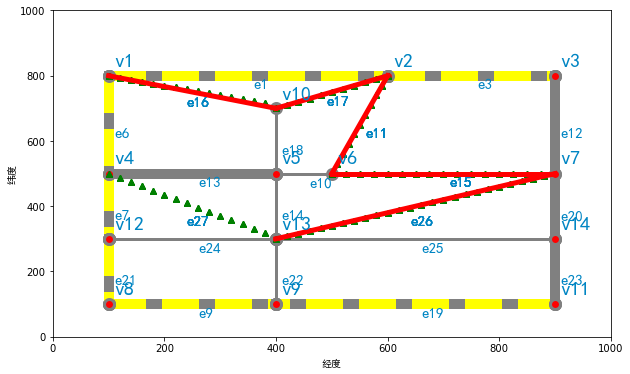

In [22]:
import random
import math
import joblib

class Mcts():
    def __init__(self):
        #self.start
        #self.end
        #self.nowNode
        self.selectNode = None
        self.recommendRoute = []
        self.simuRoute = []
        self.graph= Graph()
        self.ar = AssessRoute()
        
    def initMcts(self):
        self.recommendRoute = []
        self.simuRoute = []
        self.allPathMap = {}
        print("输入你需要推荐的起点和终点以逗号分隔：")
        c = input("input:")
        c_list = c.split(",")
        self.start = self.graph.vs.get(c_list[0])
        self.end = self.graph.vs.get(c_list[1])
        self.nowNode = self.start
        self.recommendRoute.append(self.start)
        self.simuRoute.append(self.start)
        self.gf = GraphHelper()
        filePath = 'files\\graph.csv'
        self.gf.loadGraph(filePath)
        #self.gf.rmRoute2Itself(a)
        nodeNumber = size + 1
       
    
    def select(self, nowNode, simuRoute,isSelect):
        maxPUCB = 0
        maxNode = None
        print("遍历节点："+nowNode.name+" 的孩子节点，找出PUCB值最高的节点")
        for currNode,currAdge in nowNode.edges.items():
            #If current node is nowNode's parents node, don't select this node
            if currNode in simuRoute:
                print("放弃孩子节点:"+currNode.name+" 因为已经在模拟列表中:")
                for node in simuRoute:
                    print(node.name)
                continue
            # 
            #如果这个节点没有访问过并且需要从有pucb的节点选出，不是没访问过的，一定会选择这个节点    
            if currNode.visitN == 0 and isSelect==False:
                print("PUCB优先选择一个没有被访问过的节点:"+currNode.name)
                return currNode
            currPUCB = 0
            if currNode.visitN !=0:
                currPUCB = self.calculatePUCB(nowNode,currNode,isSelect)
                print("currPUCB:"+str(currPUCB)+" currNode:"+currNode.name)
            if currPUCB>maxPUCB:
                maxPUCB = currPUCB
                maxNode = currNode
                print("maxNode:"+maxNode.name)
        return maxNode
           
    def calculatePUCB(self,parentNode,node,isSelect):
        # visitN
        #print("计算PUCB值，节点访问次数："+str(node.visitN)+" node.rewardSum:"+str(node.rewardSum)+" isSelect:"+str(isSelect))
        x = node.rewardSum/node.visitN
        n = parentNode.visitN
        nj = node.visitN
        #print("nj========"+str(nj)+" n=="+str(n))
        x1= (2*math.log(n))
        x2 = (x1/nj)**0.5
        if isSelect:
            PUCB = x
        else:
            print("x2:"+str(x2)+" x1:"+str(x1))
            PUCB = x+x2
        print("==========计算节点"+node.name+"的PUCB值================")
        print("parentNode:"+parentNode.name+" 访问次数："+str(parentNode.visitN)+ " current node:"+node.name+" 访问次数："+str(node.visitN)+" rewardSum/visiteN:"+str(x)+" PUCB:"+str(PUCB))
        return  PUCB
    
    def findShortestRouteInRandom(self,allRoutes):
        shortestPath = []
        shortestLen = 65535
        print("end to end mcts.simuRoute:")
        for node in self.recommendRoute:
            print("recommend:"+node.name)
        for node in self.simuRoute:
            print("simuRoute:"+node.name)
        endToEndRoute = self.recommendRoute+self.simuRoute[1:]
        endToEndRouteStr = []
        for node in endToEndRoute:
            print(node.name)
            endToEndRouteStr.append(node.name)
        for path in allRoutes:
            duplicate = 0
            print("path in allRoutes====="+str(path))
            for node in path:
                #print("node======="+node)
                if node in endToEndRouteStr:
                    duplicate = 1
                    print("duplicate:"+node+" break")
                    break
            if duplicate == 1:
                continue
            print("path len:"+str(len(path))+" for path:"+str(path))
            if shortestLen > len(path):
                shortestLen = len(path)
                shortestPath = path
        print("remove shortestPath:"+str(shortestPath))
        if len(shortestPath)!=0:
            allRoutes.remove(shortestPath)
        return shortestPath   
    
    
        
    def Simulation_and_Update(self,startNode,endNode):
        # 生成一条随机路径
        #allRoutes = []
        print("找所有路由，从"+startNode.name+" 到"+endNode.name)
        
        #allRoutes = self.gf.findAllRoutes(startNode.name, endNode.name, allRoutes)
        self.nowNode.visitN=self.nowNode.visitN+1
        #v12 v14, v7 v14 was removed
        allRoutes = self.allPathMap.get(self.nowNode.name+"-"+startNode.name+"-"+endNode.name)
        print("key in dict:"+self.nowNode.name+"-"+startNode.name+"-"+endNode.name)
        if allRoutes == None:
            allRoutes = self.gf.findAllRoutes(startNode.name, endNode.name, [])
           
            self.allPathMap[self.nowNode.name+"-"+startNode.name+"-"+endNode.name] = allRoutes
        elif len(allRoutes) == 0:
            if startNode.name != endNode.name:
                print("所有路由已经遍历完,返回")
                mcts.selectNode.visitN=mcts.selectNode.visitN-1
                return -1
        print("一共有："+str(len(allRoutes))+"路由")
        shortestPath = []
        if len(allRoutes) != 0:
            shortestPath = self.findShortestRouteInRandom(allRoutes)
            print("随机路由："+str(shortestPath))
            if len(shortestPath) == 0:
                print("选不出路由，返回")
                if mcts.selectNode.rewardSum!=0:
                    mcts.selectNode.visitN=mcts.selectNode.visitN-1
                return -1
        elif startNode.name == endNode.name:
            print("起点和终点一致："+startNode.name)
            shortestPath.append(startNode.name)
        shortestPathNode = []
        for nodeStr in shortestPath:
            shortestPathNode.append(self.graph.vs.get(nodeStr))
        self.simuRoute = self.simuRoute + shortestPathNode
        #c_list.append(shortestPath)
        
        print("生成一条随机路径：")
        c_list = []
        for node in self.simuRoute:
            print(node.name)
            c_list.append(node.name)
        ar.generateFeature(c_list)
        score = ar.routeAssess()
        print("放到svm去评估分数:"+str(score))
        return score
    
#把父亲及所有儿子节点n和nj reset to mcts.nowNode0
    def resetToZero(self,nowNode):
        #遍历nowNode的所有孩子清空visiteN and rewardSum
        for currNode,currAdge in nowNode.edges.items():
            print("清除 父节点nowNode："+nowNode.name+"的孩子节点："+currNode.name+"的visiteN和rewardSum为0")
            currNode.visiteN = 0
            currNode.rewardSum = 0
#     def checkDuplicatedPath(self,c_list, currentPath):
#         for i in range(len(c_list)):
#             for j in range (len(c_list[i]):
#                 if c_list[i]
# 1.Find one of shortest path in all path        
# 2.remove duplicate node in path
    def resetRouteSelection(self):
        
        self.selectNode = None
        self.recommendRoute.append(self.start)
        self.graph= Graph()
        vs_arr = list(self.graph.vs.values())
        self.nowNode.visitN = 0
        self.nowNode.rewardSum = 0
        
        for i in range(len(vs_arr)):
            print("Clear "+vs_arr[i].name+" node")
            vs_arr[i].visitN = 0
            vs_arr[i].rewardSum = 0

if __name__ == '__main__':   
    mcts = Mcts()
    mcts.initMcts()
    loopN=0
    simTimes = 10
    maxTriedTimes = 15
    exit = False
    while mcts.nowNode!= mcts.end:
        loopN=loopN+1
        c_list=[]
        if loopN>=maxTriedTimes:
            print("尝试超过"+str(maxTriedTimes)+"系统退出")
            break
       
        for i in range(simTimes):
            i = i+1
            mcts.simuRoute = []
            print("=====================尝试寻找路径，第"+str(i)+"次======mcts.nowNode:"+mcts.nowNode.name+" 访问次数："+str(mcts.nowNode.visitN))
            mcts.selectNode = mcts.select(mcts.nowNode, mcts.recommendRoute,False)
            #有时候没有选择出节点，比如v1,v7选择了v1,v2,v6,v5,v10,需要放弃这条路径
            if mcts.selectNode == None:
                print("不能选择出路由，重新开始")
                mcts.resetRouteSelection()
                #sys.exit()
                exit = True
                break
            
            #if mcts.selectNode == mcts.end:
                
            mcts.selectNode.visitN=mcts.selectNode.visitN+1
            mcts.simuRoute.append(mcts.nowNode)
            #mcts.simuRoute.append(mcts.selectNode.name)
            print("mcts.selectNode==="+mcts.selectNode.name+" mcts.end:"+mcts.end.name)
            score = mcts.Simulation_and_Update(mcts.selectNode,mcts.end)
            if score < 0:
                continue
            mcts.selectNode.rewardSum = mcts.selectNode.rewardSum+score
        if exit:
            break    
        mcts.selectNode = mcts.select(mcts.nowNode,mcts.recommendRoute,True)
        if  mcts.selectNode==None:
            print("mcts.selectNode 是空，选路径失败，重新开始")
            #mcts.resetRouteSelection()
            #continue
            break
        #把父亲及所有儿子节点n和nj reset to mcts.nowNode0
        #mcts.resetToZero(mcts.nowNode)
        for currNode,currAdge in mcts.nowNode.edges.items():
            print("清除 父节点nowNode："+mcts.nowNode.name+"的孩子节点："+currNode.name+"的visiteN和rewardSum为0")
            print("currNode.visiteN========"+str(currNode.visitN))
            currNode.visitN = 0
            currNode.rewardSum = 0
        print("================尝试路径完成，找到节点:"+mcts.selectNode.name+"添加到推荐路径================mcts.selectNode:"+mcts.selectNode.name+" "+str(mcts.selectNode.visitN)) 
        mcts.recommendRoute.append(mcts.selectNode)
        print("推荐的路由是：")
        for node in mcts.recommendRoute:
            print(node.name)
        mcts.nowNode = mcts.selectNode
    recomand_lists = []
    c_list = []
    for node in mcts.recommendRoute:
        c_list.append(node.name)
    recomand_lists.append(c_list)
    
    mcts.graph.drawGraph(recomand_lists)
